# LLM Finetuning with MonsterTuner

MonsterTuner is a new service from MonsterAPI designed to streamline the finetuning of popular AI models on our advanced compute infrastructure. With just one request, you can easily customize AI models for your business needs, making the process up to 10X more efficient and cost-effective.

### Supported Models for Finetuning:

1. LLM (Large Language Model) - For use-cases like chat completion, summary generation, sentiment analysis etc.
2. Whisper - For speech to text transcription improvement.
3. SDXL Dreambooth - Fine-tune Stable Diffusion model for customized image generation.


Checkout our [Developer Docs](https://developer.monsterapi.ai/docs/launch-a-fine-tuning-job) on how to launch an LLM Finetuning Job with no-coding

**How to finetune an LLM and Deploy it on MonsterAPI - [Complete Guide](https://blog.monsterapi.ai/how-to-fine-tune-a-large-language-model-llm-and-deploy-it-on-monsterapi/)**


In [ ]:
!pip install --upgrade monsterapi datasets huggingface_hub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.3/474.3 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 436.4/436.4 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.0 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
  Attempting uninstall: huggingface_hub
    Found existing installation: huggingface-hub 0.24.7
    Uninstalling huggingface-hub-0.24.7:
      Successfully uninstalled huggingface-hub-0.24.7
ERROR: pip's dependency resolver does not currently take into account all the packages that 

Sign up on [MonsterAPI](https://monsterapi.ai/signup?utm_source=llm-deploy-colab&utm_medium=referral) and get a free auth key. Paste it below:

In [ ]:
import os

monster_api_key = "" # @param {type:"string", placeholder:"<Replace with MonsterAPI Key>"}

os.environ['MONSTER_API_KEY'] = monster_api_key

In [ ]:
import os
from monsterapi import client as mclient

/usr/local/lib/python3.10/dist-packages/pydantic/_internal/_fields.py:132: UserWarning: Field "model_path" in PretrainedModelConfig has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(


## Format Dataset

It is important to format the sequence to be trained with gemma-2 chat template and apply EOS token to the sequence.

so below we take the input dataset, format it and push the formatted output dataset to hub.

### Login into hub to pull and push the dataset (Make sure to use token with write permission since we will be pushing to hub)

In [ ]:
from huggingface_hub import notebook_login

notebook_login(write_permission = True)

### Set your Input and Output Dataset Name



In [ ]:
input_dataset_hf_path = "monsterapi/MonsterInstruct" # @param {type:"string", placeholder:"monsterapi/MonsterInstruct"}
output_dataset_hf_path = "monsterapi/MonsterInstruct-llama3.1-formatted" # @param {type:"string", placeholder:"monsterapi/MonsterInstruct-gemma2-formatted"}

### Apply Gemma-2 chat template and EOS token

My dataset has prompt and response columns with required input and output so join them for each row and then applying the gemma-2 chat template.

In [ ]:
from datasets import load_dataset
from transformers import AutoTokenizer


tokenizer = AutoTokenizer.from_pretrained("akjindal53244/Llama-3.1-Storm-8B")

#Importing the dataset
dataset = load_dataset(input_dataset_hf_path, split="train")
dataset = dataset.shuffle(seed=65)

def format_chat_template(row):
    row_json = [{"role": "user", "content": row["prompt"]},
               {"role": "assistant", "content": row["response"]}]
    row["text"] = tokenizer.apply_chat_template(row_json, tokenize=False) + tokenizer.eos_token # Make sure to add EOS Token
    return row

dataset = dataset.map(
    format_chat_template,
    num_proc=4,
)

dataset['text'][3]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:90: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/51.0k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/296 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/736 [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/69.9M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/46490 [00:00<?, ? examples/s]

Map (num_proc=4):   0%|          | 0/46490 [00:00<?, ? examples/s]

'<|begin_of_text|><|start_header_id|>user<|end_header_id|>\n\nWrite a childrens book in the style of Dr. Seuss, urging kids to eat better<|eot_id|><|start_header_id|>assistant<|end_header_id|>\n\nI like cookies.\nI like pie.\nDo you like cupcakes?\nSo do I!\n\nI like chocolates.\nI like candy.\nDo you like lollipops?\nThat’s just dandy!\n\nI like brownies.\nI like donuts.\nDo you like glazed?\nThey make me go nuts!\n\nI like licorice.\nI like fudge.\nBut eat too much\nAnd you\'ll grow pudge!\n\nEat more vegetables.\nEat more meat.\nEat more salad.\nIt can\'t be beat!\n\nEat more cheese.\nEat more fish.\nEat as much cabbage\nAs you wish!\n\nEat more chicken.\nEat more peas.\nEat more corn.\n"More green beans, please!"\n\nWhen there\'s healthy\nFood on your plate,\nYou\'ll have more energy,\nAnd you\'ll feel great!<|eot_id|><|eot_id|>'

### Push the Dataset to hub

In [ ]:
dataset.push_to_hub(output_dataset_hf_path)

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/47 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/monsterapi/MonsterInstruct-llama3.1-formatted/commit/edb4771715ff1f9cf24410e0fb03e61206b05d44', commit_message='Upload dataset', commit_description='', oid='edb4771715ff1f9cf24410e0fb03e61206b05d44', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/monsterapi/MonsterInstruct-llama3.1-formatted', endpoint='https://huggingface.co', repo_type='dataset', repo_id='monsterapi/MonsterInstruct-llama3.1-formatted'), pr_revision=None, pr_num=None)

## Analyze Dataset Lengths to decide on Sequence cutoff Len

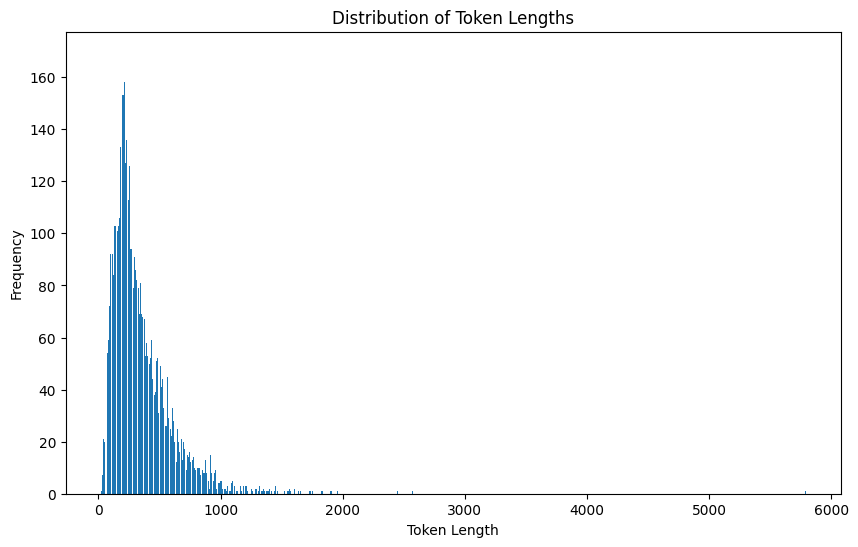

In [ ]:
from datasets import load_dataset
from transformers import AutoTokenizer
import matplotlib.pyplot as plt
from collections import Counter

# Replace 'text' with the name of the column you want to analyze
column_name = 'text'

# Load a tokenizer
# Replace 'bert-base-uncased' with the tokenizer relevant to your use case
tokenizer = AutoTokenizer.from_pretrained("akjindal53244/Llama-3.1-Storm-8B")

# Function to get token length for each entry in the dataset
def get_token_lengths(dataset, column_name):
    token_lengths = []
    for example in dataset:
        text = example[column_name]
        tokens = tokenizer.tokenize(text)
        token_lengths.append(len(tokens))
    return token_lengths

# Get token lengths for the specified column
token_lengths = get_token_lengths(dataset, column_name)

# Analyze the distribution of token lengths
length_distribution = Counter(token_lengths)

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.bar(length_distribution.keys(), length_distribution.values())
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.title('Distribution of Token Lengths')
plt.show()

### As can be seen above most rows are concentrated between 0 to 1024 so choosing 1024 as cutoff len will be the best

## Start Finetuning

### Launch Finetuning Job

This code block sets up `launch_payload` for fine-tuning an LLMs using specific configurations. The payload includes model path, LoRA parameters, data source details, and training settings such as learning rate and epochs. The model is fine-tuned using these settings

In [ ]:
client = mclient(api_key=monster_api_key)

launch_payload = {
    "pretrainedmodel_config": {
        "model_path": "akjindal53244/Llama-3.1-Storm-8B",
        "use_lora": True,
        "lora_r": 16,
        "lora_alpha": 32,
        "lora_dropout": 0,
        "lora_bias": "none",
        "use_quantization": False,
        "use_gradient_checkpointing": False,
        "parallelization": "nmp"
    },
    "data_config": {
        "data_path": output_dataset_hf_path,
        "data_subset": "default",
        "data_source_type": "hub_link",
        "prompt_template": "{text}",
        "cutoff_len": 1024,
        "prevalidated": False
    },
    "training_config": {
        "early_stopping_patience": 5,
        "num_train_epochs": 5,
        "gradient_accumulation_steps": 1,
        "warmup_steps": 25,
        "learning_rate": 0.001,
        "lr_scheduler_type": "cosine",
        "group_by_length": False
    },
    "logging_config": {
      "use_wandb": False
  }
}


ret = client.finetune(service="llm", params=launch_payload)
deployment_id = ret.get("deployment_id")
print(ret)

{'message': 'Deployment Launched', 'servingParams': {'config_url': 's3://finetuning-service/job_configs/e2c5bf00-ccdd-4d3d-9cc8-7b1b5e1a3658.json', 'deployment_id': 'e2c5bf00-ccdd-4d3d-9cc8-7b1b5e1a3658', 'deployment_name': '"Null"', 'hostname': 'adorable_joliot_412d1cd0-c'}, 'deployment_id': 'e2c5bf00-ccdd-4d3d-9cc8-7b1b5e1a3658'}


### Fetch your Finetuning Job Status:

Wait until the status is `Live`. It should take 5-10 minutes.

In [ ]:
# Get deployment status
status_ret = client.get_deployment_status(deployment_id)
print(status_ret)

{'status': 'pending', 'message': 'Instance is still being provisioned, please wait and try again', 'credits_consumed': 0.0, 'created_at': '2024-09-18T17:19:48.713892'}


------

### Get Finetuning Job Logs

To see your finetuning job progress, please run the cell below

In [ ]:
# Get deployment logs
logs_ret = client.get_deployment_logs(deployment_id)
print(logs_ret)

------

### Terminate Finetuning Job

CAUTION: If you wish to terminate your finetuning job, please uncomment and
run the cell below

In [ ]:
## Terminate Deployment
# terminate_return = client.terminate_deployment(deployment_id)
# print(terminate_return)